<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [16]:
import os
import cv2

import mrcnn.utils
import mrcnn.config
import mrcnn
from mrcnn import visualize
from mrcnn.model import MaskRCNN

Creating necessary config for network

In [12]:
class MaskRCNNConfig(mrcnn.config.Config):
    NAME = "coco_pretrained_model_config"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.8
    NUM_CLASSES = 81

Loading weights

In [13]:
DATASET_FILE = "mask_rcnn_coco.h5"
if not os.path.exists(DATASET_FILE):
    mrcnn.utils.download_trained_weights(DATASET_FILE)

Creating the model

In [14]:
model = MaskRCNN(mode="inference", model_dir="logs", config=MaskRCNNConfig())
model.load_weights(DATASET_FILE, by_name=True)

Processing images

Processing 1 images
image                    shape: (732, 1100, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1100.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


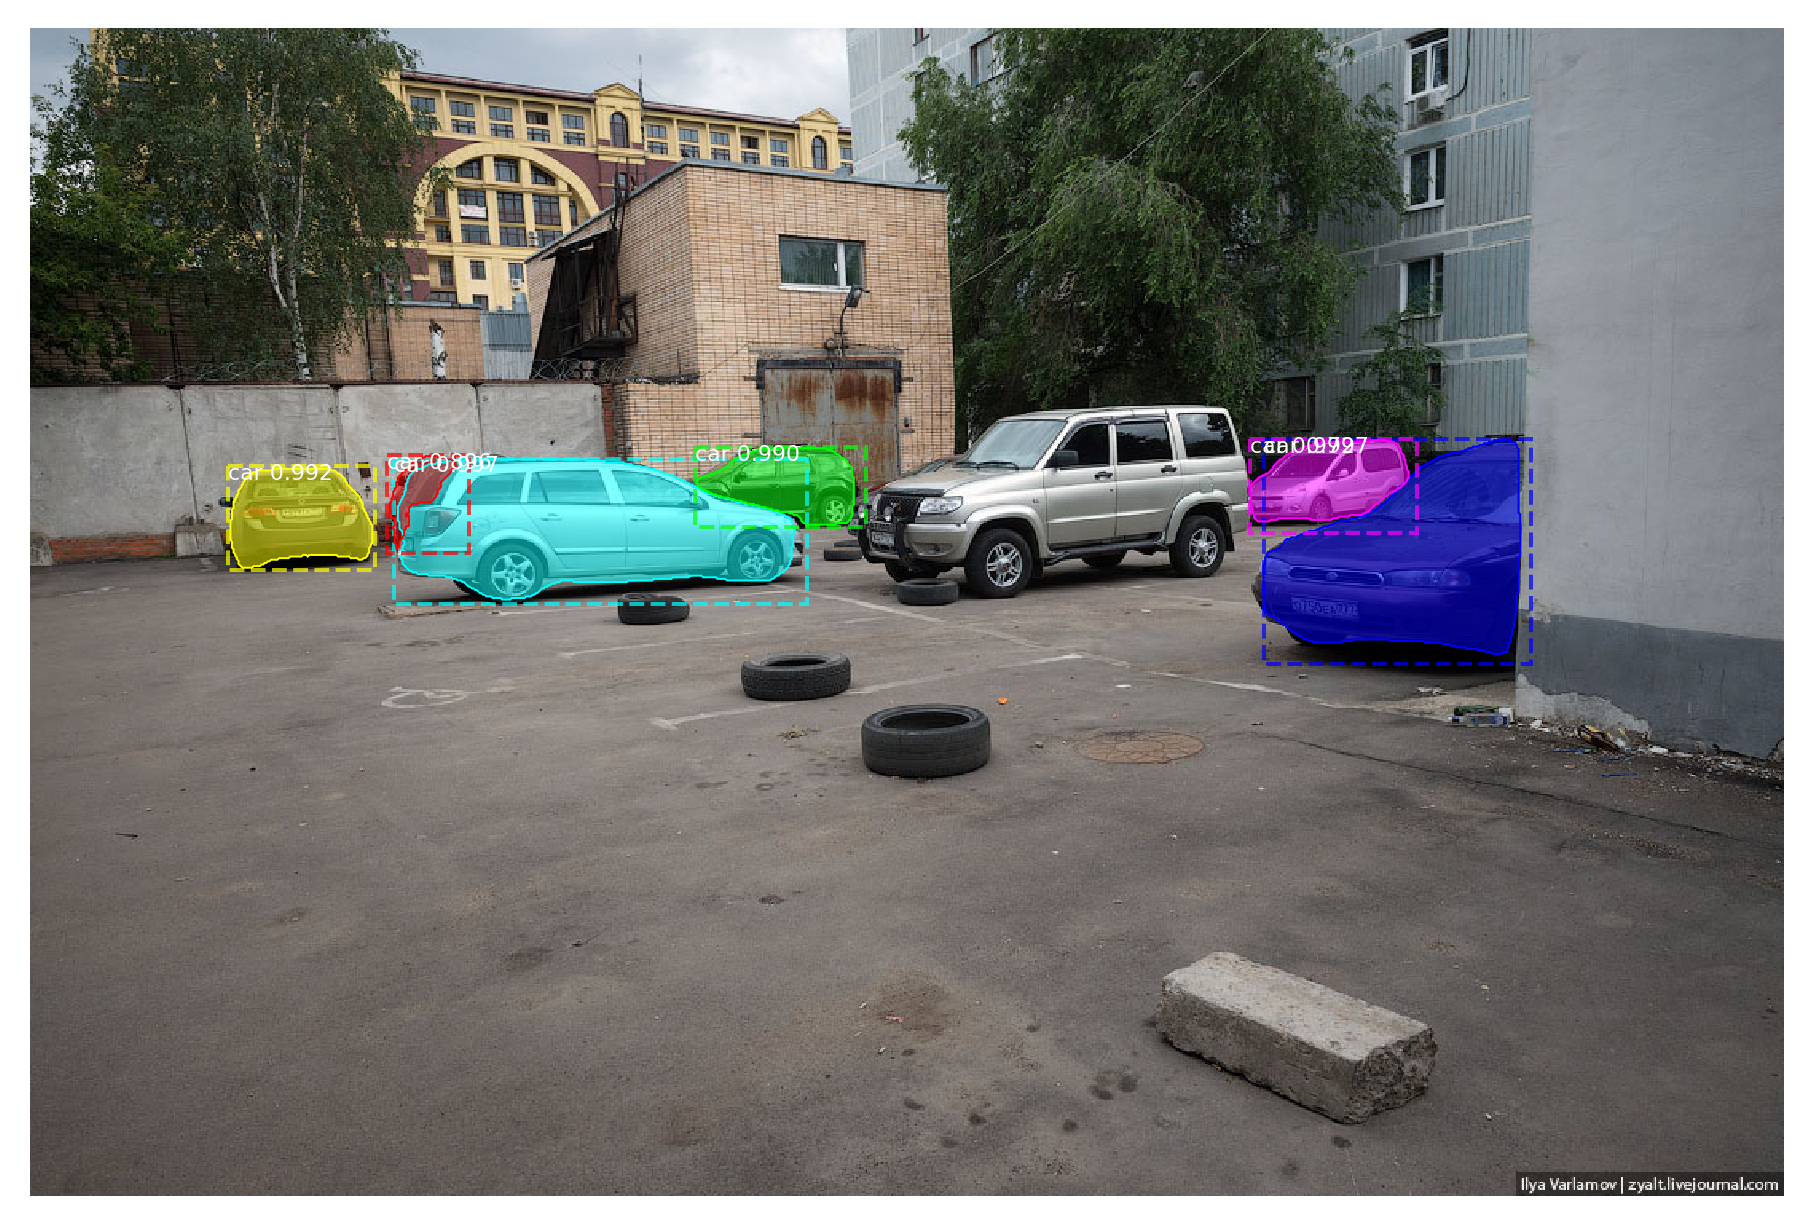

In [40]:
IMAGE_DIR = os.path.join(os.getcwd(), "images")
for filename in os.listdir(IMAGE_DIR):
    image = cv2.imread(os.path.join(IMAGE_DIR, filename))
    rgb_image = image[:, :, ::-1]
    detections = model.detect([rgb_image], verbose=1)[0]

    visualize.display_instances(
        rgb_image, detections['rois'], detections['masks'],
        detections['class_ids'],
        ['BG', "person", "bicycle", "car", "motorcycle", "bus", "truck"],
        scores=detections['scores'])